Khả năng hoàn trả của khách hàng

In [370]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

In [371]:
df = pd.read_csv("loan_data.csv")

1. Khai Phá Dữ liệu

In [372]:
df1 = df.copy()

In [373]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [374]:
df1.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [375]:
df1.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [376]:
df1.duplicated().sum()

0

In [377]:
df1

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [378]:
df1['credit.policy'].value_counts()

credit.policy
1    7710
0    1868
Name: count, dtype: int64

In [379]:
df1['purpose'].value_counts()

purpose
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: count, dtype: int64

In [380]:
df1['int.rate'].value_counts()

int.rate
0.1253    354
0.0894    299
0.1183    243
0.1218    215
0.0963    210
         ... 
0.2016      1
0.1683      1
0.1778      1
0.1756      1
0.1867      1
Name: count, Length: 249, dtype: int64

In [381]:
df1['installment'].value_counts()

installment
317.72    41
316.11    34
319.47    29
381.26    27
662.68    27
          ..
97.53      1
76.26      1
150.84     1
158.99     1
853.43     1
Name: count, Length: 4788, dtype: int64

In [382]:
df1['dti'].value_counts()

dti
0.00     89
10.00    19
0.60     16
15.10    13
12.00    13
         ..
5.90      1
19.74     1
29.15     1
1.09      1
24.05     1
Name: count, Length: 2529, dtype: int64

In [383]:
df1['fico'].value_counts()

fico
687    548
682    536
692    498
697    476
702    472
707    444
667    438
677    427
717    424
662    414
712    395
672    395
722    388
727    361
732    330
742    324
737    313
752    258
747    236
757    231
762    220
772    158
767    142
777    140
652    131
657    127
782    118
647    112
642    102
792     97
787     85
797     76
802     55
807     45
812     33
632      6
817      6
822      5
637      5
627      2
612      2
827      1
617      1
622      1
Name: count, dtype: int64

In [384]:
df1['days.with.cr.line'].value_counts()

days.with.cr.line
3660.000000     50
3630.000000     48
3990.000000     46
4410.000000     44
3600.000000     41
                ..
9395.000000      1
5613.958333      1
2884.000000      1
1728.000000      1
10474.000000     1
Name: count, Length: 2687, dtype: int64

In [385]:
df1['log.annual.inc'].value_counts()

log.annual.inc
11.002100    308
10.819778    248
10.308953    224
10.596635    224
10.714418    221
            ... 
11.217534      1
12.078239      1
10.068451      1
9.621788       1
10.110472      1
Name: count, Length: 1987, dtype: int64

In [386]:
df1['revol.bal'].value_counts()

revol.bal
0        321
298       10
255       10
682        9
346        8
        ... 
24876      1
14588      1
9866       1
13450      1
37879      1
Name: count, Length: 7869, dtype: int64

In [387]:
df1['revol.util'].value_counts()

revol.util
0.00     297
0.50      26
47.80     22
0.30      22
73.70     22
        ... 
49.63      1
0.04       1
91.40      1
7.28       1
69.14      1
Name: count, Length: 1035, dtype: int64

In [388]:
df1['inq.last.6mths'].value_counts()

inq.last.6mths
0     3637
1     2462
2     1384
3      864
4      475
5      278
6      165
7      100
8       72
9       47
10      23
11      15
12      15
15       9
13       6
14       6
18       4
16       3
19       2
24       2
17       2
33       1
20       1
27       1
25       1
28       1
31       1
32       1
Name: count, dtype: int64

In [389]:
df1['pub.rec'].value_counts()

pub.rec
0    9019
1     533
2      19
3       5
4       1
5       1
Name: count, dtype: int64

In [390]:
df1['delinq.2yrs'].value_counts()

delinq.2yrs
0     8458
1      832
2      192
3       65
4       19
5        6
6        2
13       1
7        1
8        1
11       1
Name: count, dtype: int64

In [391]:
df1.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

<Axes: xlabel='not.fully.paid', ylabel='count'>

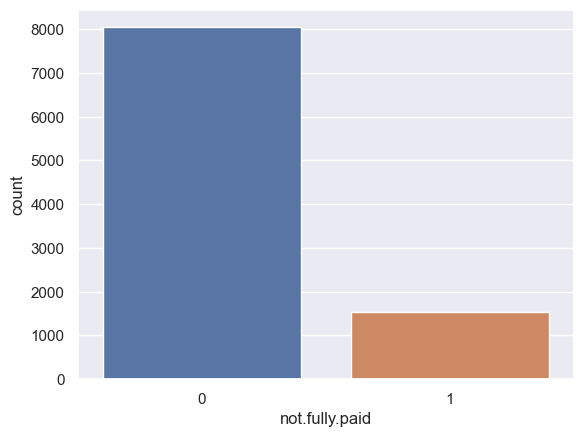

In [392]:
sns.countplot(data=df1, x='not.fully.paid')

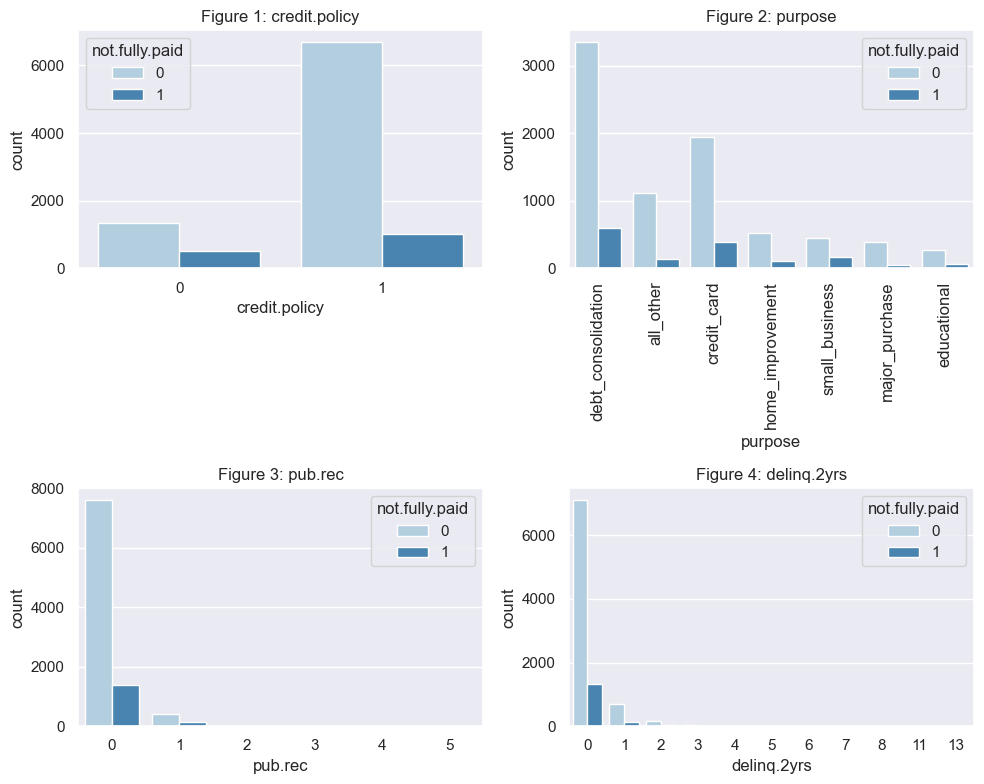

In [393]:
categori = ['credit.policy', 'purpose', 'pub.rec', 'delinq.2yrs']
n_rows, n_cols, index = 2, 2, 0
fix, ax = plt.subplots(nrows=n_rows, ncols= n_cols, figsize = (10, 8))
for row in range(0, n_rows):
    for col in range(0, n_cols):
        ax_i = ax[row, col]
        sns.countplot(data=df1, x=categori[index], hue='not.fully.paid', palette= "Blues", ax= ax_i)
        if categori[index] == 'purpose':
            tmp = df1[categori[index]].value_counts().index.to_list()
            x_ticks = [i for i in tmp]
            ax_i.set_xticklabels(x_ticks, rotation=90, fontsize=12)
        ax_i.set_title(f"Figure {index + 1}: {categori[index]}")
        index += 1
plt.tight_layout()
plt.show()

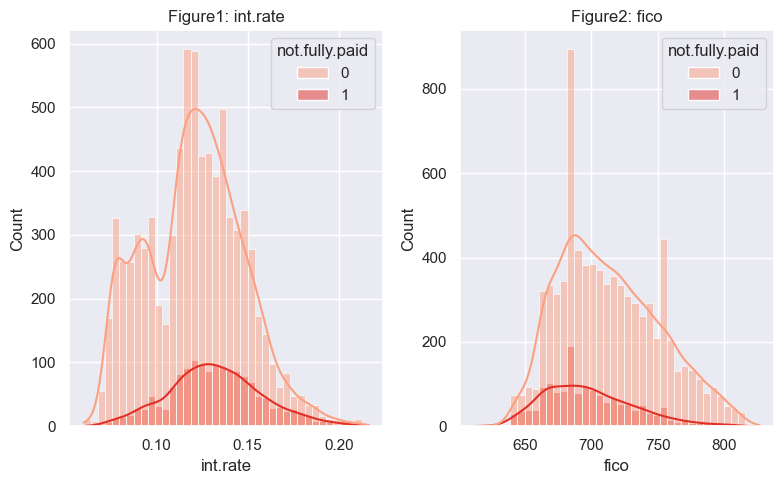

In [394]:
n_rows = 1
n_cols = 2
num_features = ['int.rate', 'fico']
fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(8, 5))

for row in range(0, n_rows):
    for col in range(0, n_cols):
        index = row * n_cols + col
        if index < len(num_features):
            ax_i = ax[col]
            sns.histplot(data=df1, x= num_features[index], hue= "not.fully.paid", palette= "Reds", ax= ax_i, bins= 40, kde= True)
            ax_i.set_title(f"Figure{index + 1}: {num_features[index]}")
plt.tight_layout()
plt.show()

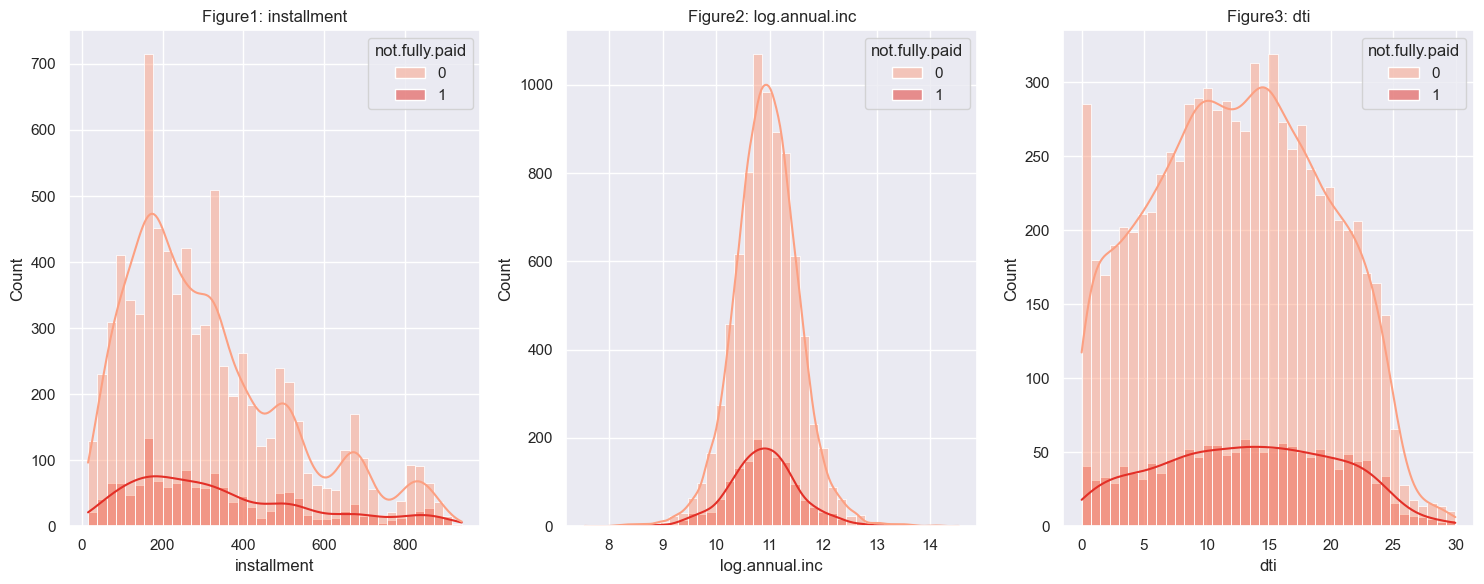

In [395]:
n_rows = 1
n_cols = 3
num_features = ['installment', 'log.annual.inc', 'dti']
fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 6))

for row in range(0, n_rows):
    for col in range(0, n_cols):
        index = row * n_cols + col
        if index < len(num_features):
            ax_i = ax[col]
            sns.histplot(data=df1, x= num_features[index], hue= "not.fully.paid", palette= "Reds", ax= ax_i, bins= 40, kde= True)
            ax_i.set_title(f"Figure{index + 1}: {num_features[index]}")
plt.tight_layout()
plt.show()

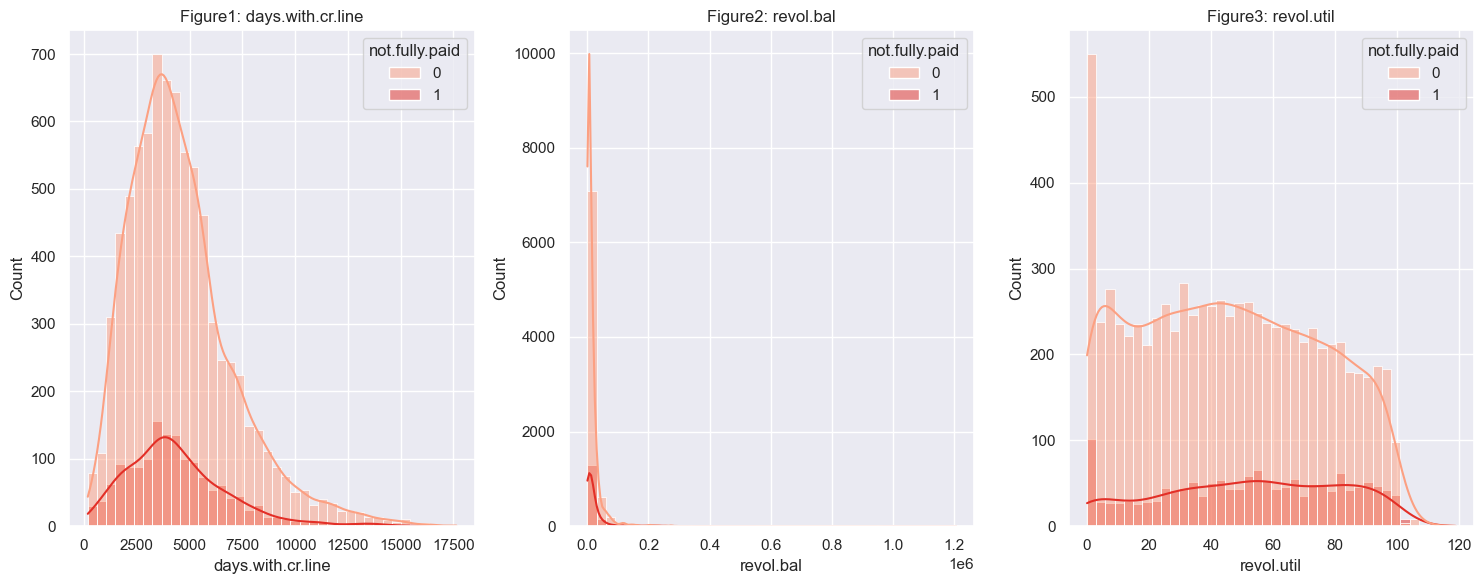

In [396]:
n_rows = 1
n_cols = 3
num_features = ['days.with.cr.line', 'revol.bal', 'revol.util']
fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 6))

for row in range(0, n_rows):
    for col in range(0, n_cols):
        index = row * n_cols + col
        if index < len(num_features):
            ax_i = ax[col]
            sns.histplot(data=df1, x= num_features[index], hue= "not.fully.paid", palette= "Reds", ax= ax_i, bins= 40, kde= True)
            ax_i.set_title(f"Figure{index + 1}: {num_features[index]}")
plt.tight_layout()
plt.show()

Ngoại lai

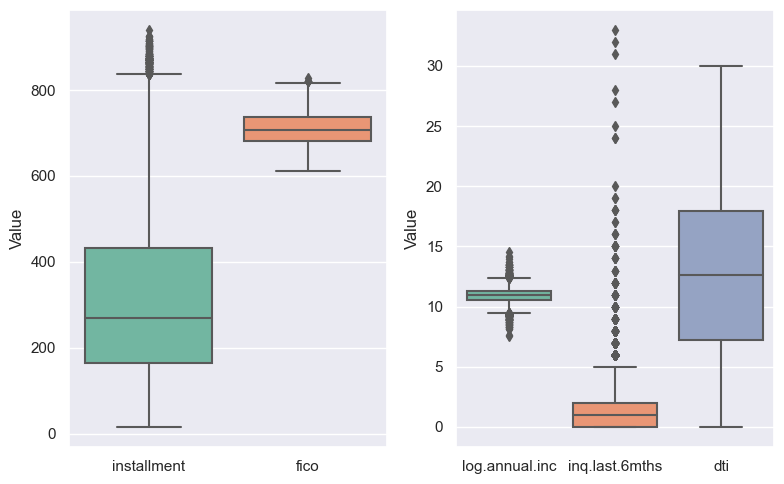

In [397]:
dataF = pd.DataFrame(
    {
        "installment" : df1['installment'], 
        'fico' : df1['fico']
    }
)
plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=dataF, palette="Set2")
plt.ylabel('Value')

dataF1 = pd.DataFrame(
    {
        'log.annual.inc' : df1['log.annual.inc'],
        'inq.last.6mths' : df1['inq.last.6mths'],
        'dti' : df1['dti']
    }
)
plt.subplot(1, 2, 2)
sns.boxplot(data=dataF1, palette="Set2")
plt.ylabel('Value')
plt.tight_layout()
plt.show()

/var/folders/_3/zbd4dqld5rjby9s9vfccxmm00000gn/T/ipykernel_90704/2550553726.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


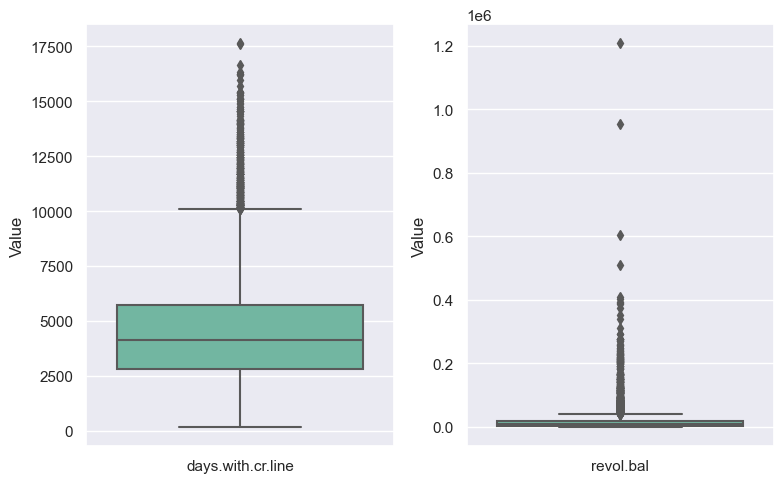

In [398]:
dataF2 = pd.DataFrame(
    {
        'days.with.cr.line' : df1['days.with.cr.line'],
    }
)
fig, ax = plt.subplots(figsize=(8, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=dataF2, palette="Set2")
plt.ylabel('Value')

dataF3 = pd.DataFrame(
    {
        'revol.bal' : df1['revol.bal']
    }
)
plt.subplot(1, 2, 2)
sns.boxplot(data=dataF3, palette="Set2")
plt.ylabel('Value')
plt.tight_layout()
plt.show()

/var/folders/_3/zbd4dqld5rjby9s9vfccxmm00000gn/T/ipykernel_90704/616922536.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


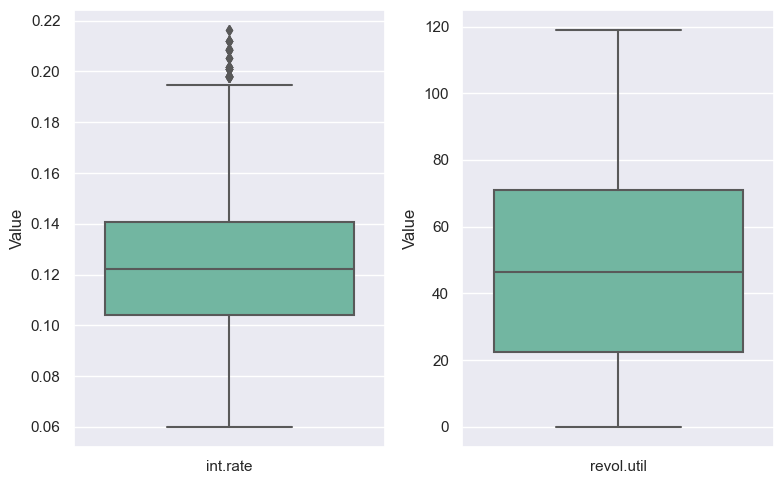

In [399]:
dataF4 = pd.DataFrame(
    {
        'int.rate' : df1['int.rate']
    }
)
fig, ax = plt.subplots(figsize=(8, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=dataF4, palette="Set2")
plt.ylabel('Value')

dataF5 = pd.DataFrame(
    {
        'revol.util' : df1['revol.util']
    }
)
plt.subplot(1, 2, 2)
sns.boxplot(data=dataF5, palette="Set2")
plt.ylabel('Value')
plt.tight_layout()
plt.show()

In [400]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
df1['purpose'] = encode.fit_transform(df1['purpose'])

Ma trận tương quan giữa các feature

In [401]:
correlation_matrix = df1.corr().abs()

/var/folders/_3/zbd4dqld5rjby9s9vfccxmm00000gn/T/ipykernel_90704/607800336.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


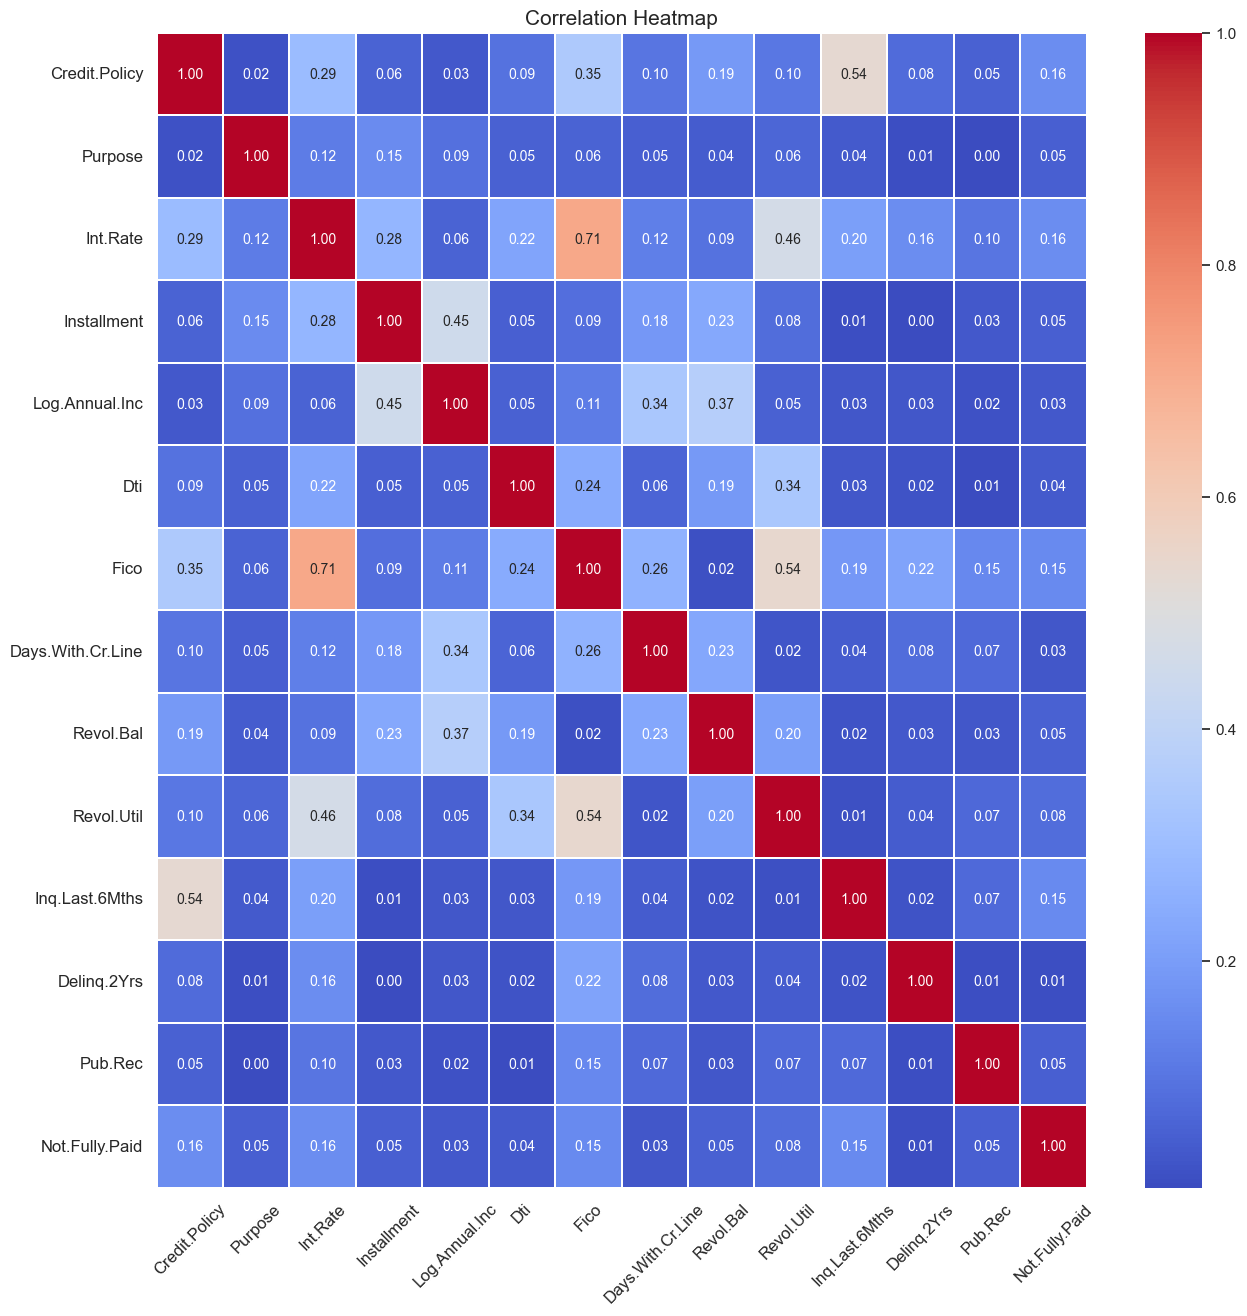

In [402]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt='.2f', annot_kws={'size': 10},
            linecolor='white', linewidths=0.05)
ax.set_title('Correlation Heatmap', fontsize=15)
x_ticks = [i.title() for i in correlation_matrix.columns]
y_ticks = [i.title() for i in correlation_matrix.index]
ax.set_xticklabels(x_ticks, rotation=45, fontsize=12)
ax.set_yticklabels(y_ticks, rotation=0, fontsize=12)
fig.show()

2. Tiền xử lý dữ liệu

Mã hóa 

In [403]:
df2 = df.copy()

In [404]:
cat_feats = ['purpose']
df2 = pd.get_dummies(df2, columns=cat_feats,drop_first=True)

Loại bỏ feature có tính tương quan cao (Nếu có)

In [405]:
# df2.drop('fico', axis=1, inplace=True)

Xử lý ngoại lai

int.rate, installment, log.annual.inc, fico(rat it ngoai lai)
days.with.cr.line, revol.bal, inq.last.6mths, delinq.2yrs(co it)

In [406]:
df_iqr = df2.copy()

In [407]:
noise = ['int.rate','installment', 'log.annual.inc', 'fico', 'days.with.cr.line', 'revol.bal', 'inq.last.6mths']
index = [1.43, 1.48, 1.455, 1.545, 1.32, 0.826, 2]
pos = 0

In [408]:
for _index in noise:
    q25, q75 = np.quantile(df_iqr[_index], 0.25), np.quantile(df_iqr[_index], 0.75)
    iqr = q75 - q25
    lower, upper = q25 - index[pos]*iqr, q75 + index[pos]*iqr
    df_iqr = df_iqr[(df_iqr[_index] < upper) & (df_iqr[_index] > lower)]
    pos += 1

In [409]:
df_iqr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7232 entries, 2 to 9576
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               7232 non-null   int64  
 1   int.rate                    7232 non-null   float64
 2   installment                 7232 non-null   float64
 3   log.annual.inc              7232 non-null   float64
 4   dti                         7232 non-null   float64
 5   fico                        7232 non-null   int64  
 6   days.with.cr.line           7232 non-null   float64
 7   revol.bal                   7232 non-null   int64  
 8   revol.util                  7232 non-null   float64
 9   inq.last.6mths              7232 non-null   int64  
 10  delinq.2yrs                 7232 non-null   int64  
 11  pub.rec                     7232 non-null   int64  
 12  not.fully.paid              7232 non-null   int64  
 13  purpose_credit_card         7232 non-n

In [410]:
df_iqr.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,7232.000000,7232.000000,7232.000000,7232.000000,7232.000000,7232.000000,7232.000000,7232.000000,7232.000000,7232.000000,7232.000000,7232.000000,7232.000000
mean,0.862694,0.120230,291.862388,10.834321,12.217905,711.202848,4049.873519,8885.919801,45.013779,1.201466,0.165653,0.062500,0.140487
std,0.344194,0.025408,177.344629,0.499721,6.778868,37.658216,1911.208580,7405.220421,28.617486,1.340902,0.537045,0.261309,0.347515
min,0.000000,0.060000,15.690000,9.487972,0.000000,617.000000,180.041667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.100800,159.740000,10.491274,6.880000,682.000000,2610.041667,2716.750000,21.075000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.121800,255.800000,10.819978,12.150000,707.000000,3810.041667,7076.000000,43.700000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.137900,396.170000,11.162346,17.472500,737.000000,5220.000000,13622.750000,67.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.191600,824.220000,12.323856,29.900000,817.000000,9420.000000,28895.000000,108.800000,5.000000,11.000000,4.000000,1.000000


Chia bộ dữ liệu thành dữ liệu vào và nhãn

In [411]:
x = df_iqr.drop('not.fully.paid', axis=1)
y = df_iqr['not.fully.paid']

In [412]:
x

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,False,True,False,False,False,False
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,True,False,False,False,False,False
6,1,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,False,True,False,False,False,False
7,1,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,False,False,False,False,False,False
9,1,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9567,0,0.1311,101.24,10.968198,8.23,687,2790.041667,1514,13.8,5,0,0,False,False,False,False,False,False
9570,0,0.1671,113.63,10.645425,28.06,672,3210.041667,25759,63.8,5,0,0,False,False,False,False,False,False
9571,0,0.1568,161.01,11.225243,8.00,677,7230.000000,6909,29.2,4,0,1,False,False,False,False,False,False
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,False,False,False,False,False,False


In [413]:
y

2       0
4       0
6       1
7       1
9       0
       ..
9567    0
9570    1
9571    1
9574    1
9576    1
Name: not.fully.paid, Length: 7232, dtype: int64

Tạo thêm dữ liệu

In [414]:
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
smote1 = RandomOverSampler(random_state=1)
x1, y1 = smote1.fit_resample(x, y)

Chuẩn hóa dữ liệu

In [415]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
sc.fit(x1)
x1 = sc.transform(x1)

In [416]:
x1

array([[1.        , 0.57522796, 0.43433144, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.62765957, 0.10788715, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.68085106, 0.22056077, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.63677812, 0.42578507, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.54103343, 0.06409162, ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.40121581, 0.19404351, ..., 0.        , 0.        ,
        0.        ]])

In [417]:
x1.shape, y1.shape

((12432, 18), (12432,))

Chia bộ dữ liệu thành tập train và test với tỉ lệ 80% để học, 20% để kiểm thử

In [418]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=42, shuffle=True, stratify=y1)

In [419]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [420]:
x_train.shape, y_train.shape

((9945, 18), (9945,))

In [421]:
x_test.shape, y_test.shape

((2487, 18), (2487,))

3. Xây dựng mô hình RandomForest cho bài toán phân loại & đánh giá mô hình

Tìm kiếm tham số tối ưu cho mô hình RandomForest

In [422]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'n_estimators' : [40, 45, 50, 55, 60],
    'max_depth' : [None, 2, 5],
    'min_samples_split' : [None, 2, 5]
}

rf_classifier = RandomForestClassifier(random_state=42, class_weight='balanced')

grid_search = GridSearchCV(estimator=rf_classifier, param_grid= param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_train, y_train)

/Users/giangdt29.lab/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
75 fits failed out of a total of 225.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/giangdt29.lab/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/giangdt29.lab/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/Users/giangdt29.lab/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 600, in _validate_params
    validate_par

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'max_depth': [None, 2, 5],
                         'min_samples_split': [None, 2, 5],
                         'n_estimators': [40, 45, 50, 55, 60]},
             scoring='accuracy')

In [423]:
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)

Best parameters found:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best accuracy found:  0.9719457013574659


Model

In [424]:
best_params = grid_search.best_params_
model = RandomForestClassifier(n_estimators=best_params['n_estimators'], 
                               random_state=42, class_weight='balanced',
                               max_depth=best_params['max_depth'], 
                               min_samples_split=best_params['min_samples_split'])

model.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=50,
                       random_state=42)

In [425]:
_score = model.score(x_test, y_test)
print(_score)

0.9919581825492562


In [426]:
y_pred = model.predict(x_test)

In [427]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
def plot_classification_results(y_test, y_pred):
    # Tính toán ma trận nhầm lẫn
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.title("Confusion Matrix")
    sns.heatmap(cm, annot=True, fmt='d', annot_kws={'size': 10})
    
    # Vẽ ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.subplot(1, 2, 2)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()

In [428]:
from collections import Counter
couter = Counter(y_test)
print(couter)

Counter({0: 1244, 1: 1243})


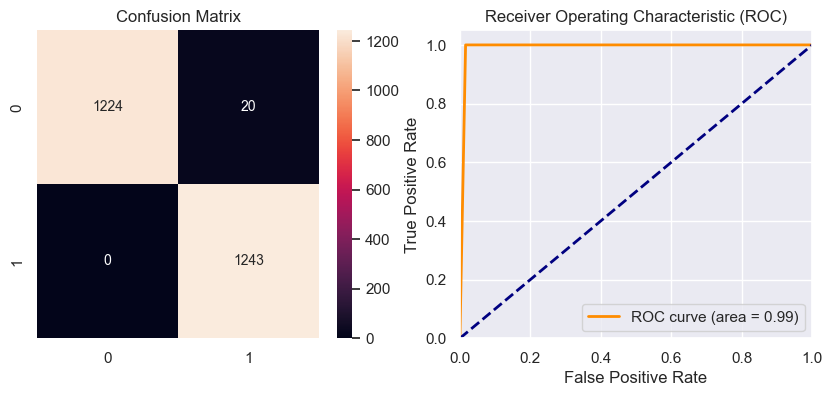

In [429]:
plot_classification_results(y_test, y_pred)

In [430]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1244
           1       0.98      1.00      0.99      1243

    accuracy                           0.99      2487
   macro avg       0.99      0.99      0.99      2487
weighted avg       0.99      0.99      0.99      2487



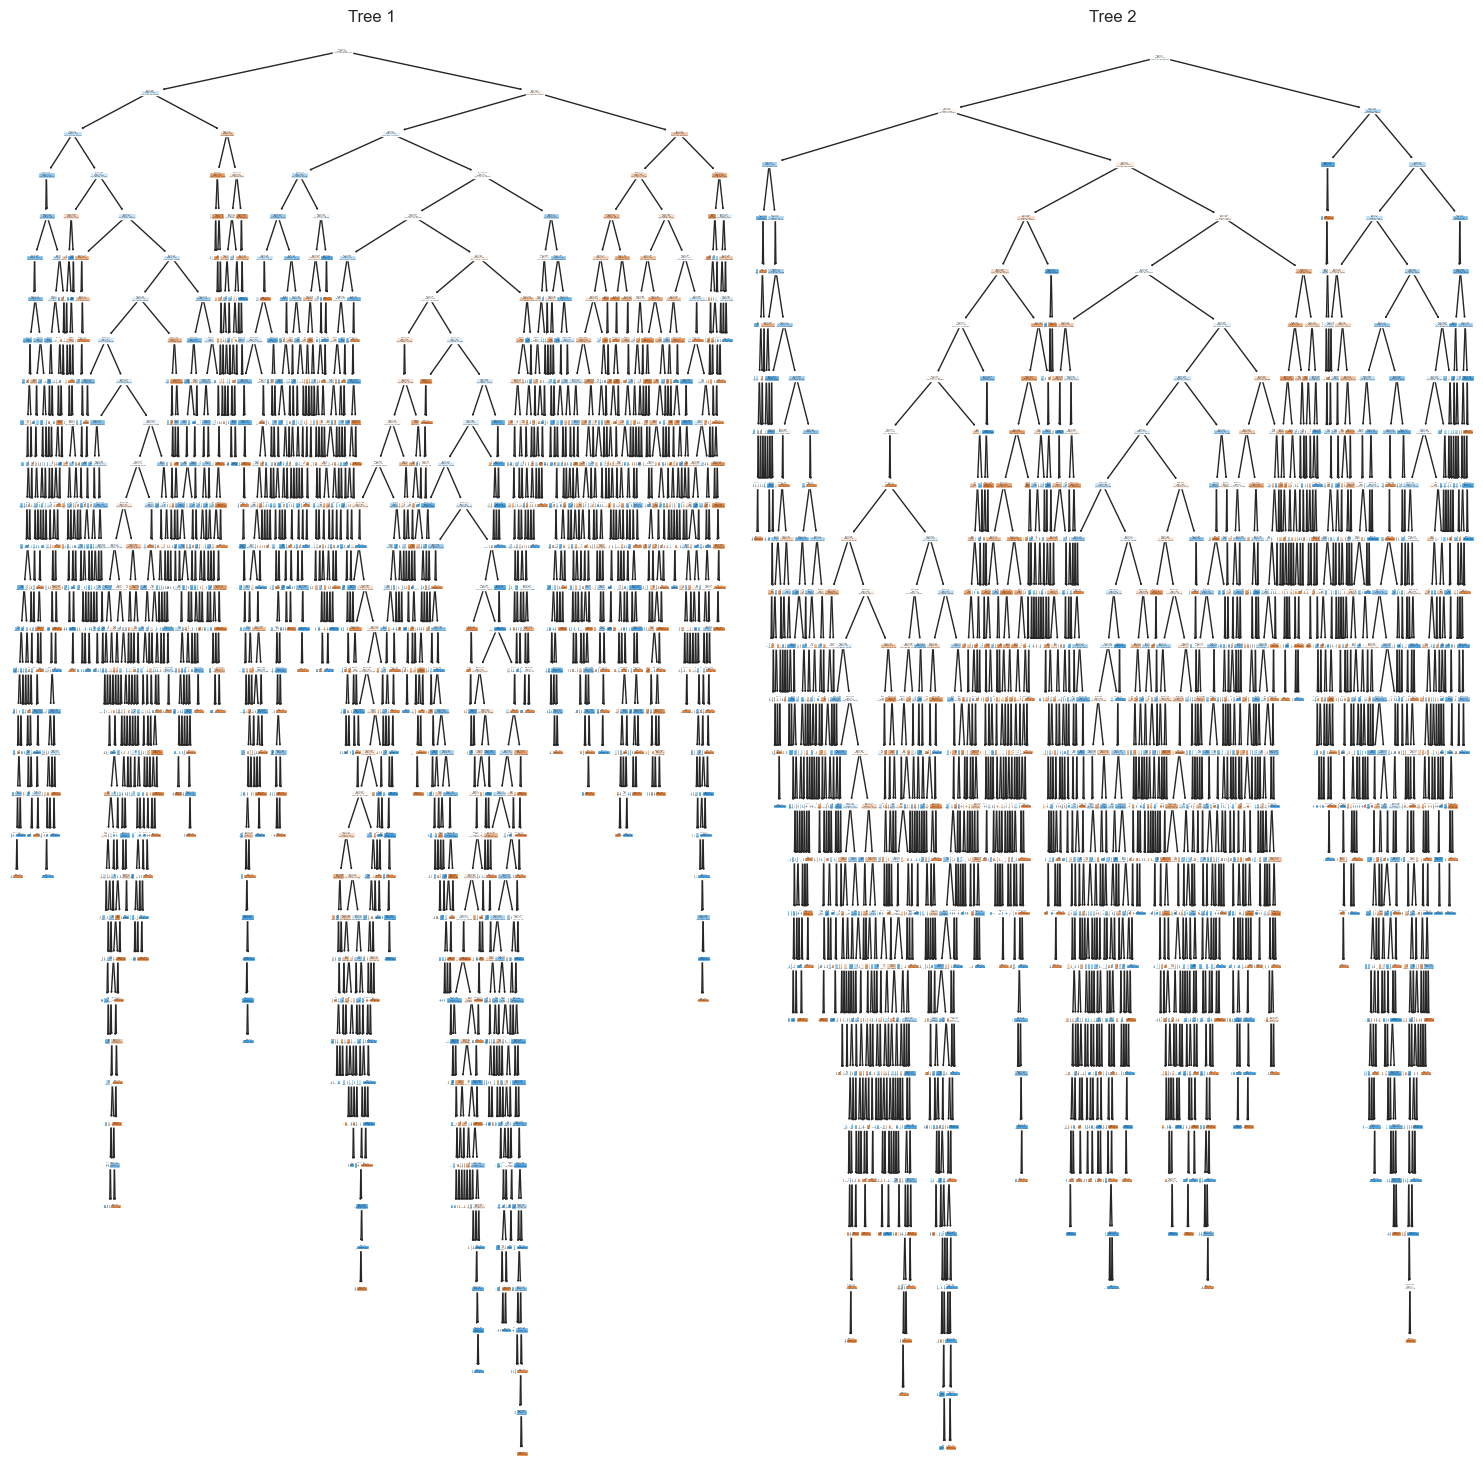

In [431]:
from sklearn.tree import plot_tree

best_rf_model = grid_search.best_estimator_

all_decision_trees = best_rf_model.estimators_
# print(all_decision_trees)
# Vẽ 2 cây đầu tiên trong rừng 50 cây
plt.figure(figsize=(15, 15))
for i, tree_in_forest in enumerate(all_decision_trees):
    plt.subplot(1, 2, i+1)
    plot_tree(tree_in_forest, filled=True)
    plt.title(f'Tree {i+1}')
    if i == 1:
        break

plt.tight_layout()
plt.show()

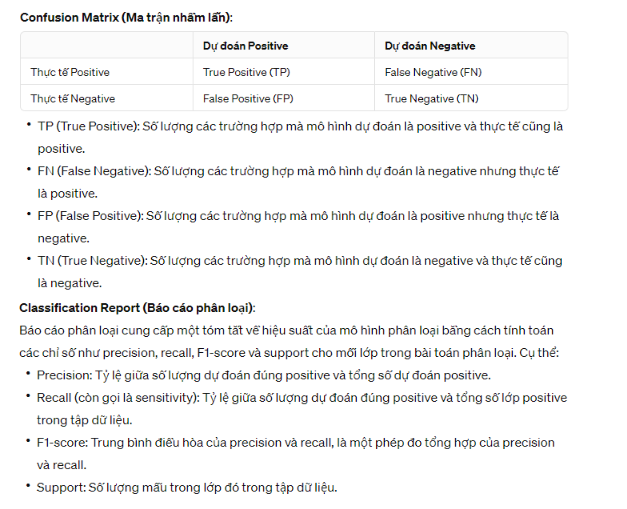